In [1]:
from models import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
count_Q = "features/count_vector_above50_no_sw_Q.csv"
count_Q_bert = "features/count_vector_above50_no_sw_Q_bert.csv"

tfidf_Q = "features/tfidf_vector_above50_no_sw_Q.csv"
tfidf_Q_bert = "features/tfidf_vector_above50_no_sw_Q_bert.csv"

tfidf_Q_and_A = "features/tfidf_vector_above50_no_sw_Q_and_A.csv"
tfidf_Q_and_A_bert = "features/tfidf_vector_above50_no_sw_Q_and_A_bert.csv"

In [5]:
def read_features_file(path):
    df = pd.read_csv(path)

    return df.drop(["Unnamed: 0"], axis=1)

In [6]:
read_features_file(count_Q).head(2)

,Question,Answer,QuestionLen,AnswerLen,Gender,אבא,אבי,אגב,אדם,אהבה,...,תלוי,תמיד,תעזרו,תענו,תפילה,תפילות,תפילין,תקופה,תשובה,תשובות
0,"\nשלום לכם, אני נער בן 14 וגר באחת ה""התנחלויות...","\nב""ה\nד´ שלום!\nראשית רציתי לומר לך שאני מאוד...",182,1257,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,\nלעיתים יוצא לנו להתחיל את הסעודה בראש חודש ו...,"\nב""ה\nשלום וברכה\nהדבר נתון במחלוקת הפוסקים ה...",286,1095,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
def get_x(df):
    return df.drop(["Question", "Answer", "Gender"], axis=1)

def get_y(df):
    return df["Gender"]

In [7]:
def df_train_test_split(df):
    X = get_x(df)
    Y = get_y(df)

    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        Y, 
        test_size = 0.25, 
        stratify=Y, 
        random_state=42
    )

    return X_train, X_test, y_train, y_test

# Analyzing different features files:

## Count Vectorizers:

In [8]:
count_q_feat = read_features_file(count_Q)
count_q_bert_feat = read_features_file(count_Q_bert)

In [9]:
count_q_feat_vec = df_train_test_split(count_q_feat)
count_q_bert_feat_vec = df_train_test_split(count_q_bert_feat)

### Logistic Regression

| Model | Featurs | Train Accuracy | Test Accuracy |
| :-: | :-: | :-: | :-: |
| Logistic Regression | Count Vector Questions | 0.904 | 0.865
| Logistic Regression | Count Vector Questions (bert) | 0.912 | 0.869
| Logistic Regression | Count Vector Questions | 0.933 | 0.864
| Logistic Regression | Count Vector Questions (bert) | 0.943 | 0.863
| Logistic Regression | Count Vector Questions | 0.887 | 0.852
| Logistic Regression CV | Count Vector Questions | 0.908 | 0.855

In [10]:
log_reg = LogReg(*count_q_feat_vec, max_iter=100)

LogReg train accuracy: 0.904
LogReg test accuracy: 0.865
Accuracy: 0.8648648648648649
[[566  62]
 [108 522]]
Classification report:
               precision    recall  f1-score   support

           1       0.84      0.90      0.87       628
           2       0.89      0.83      0.86       630

    accuracy                           0.86      1258
   macro avg       0.87      0.86      0.86      1258
weighted avg       0.87      0.86      0.86      1258



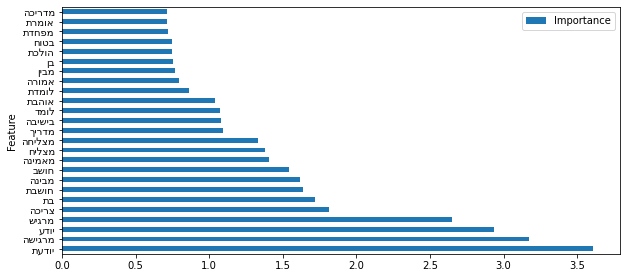

In [11]:
plot_features_importance(log_reg.coef_[0], count_q_feat_vec[0])

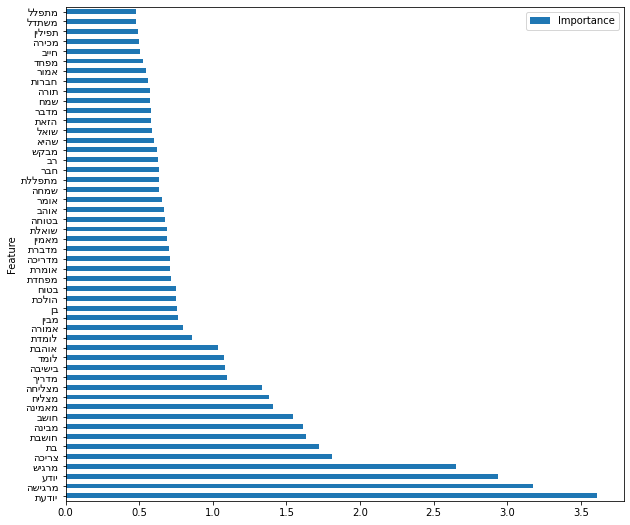

In [12]:
plot_features_importance(log_reg.coef_[0], count_q_feat_vec[0], 50)

In [13]:
log_reg_bert = LogReg(*count_q_bert_feat_vec)

LogReg train accuracy: 0.912
LogReg test accuracy: 0.869
Accuracy: 0.8688394276629571
[[568  60]
 [105 525]]
Classification report:
               precision    recall  f1-score   support

           1       0.84      0.90      0.87       628
           2       0.90      0.83      0.86       630

    accuracy                           0.87      1258
   macro avg       0.87      0.87      0.87      1258
weighted avg       0.87      0.87      0.87      1258



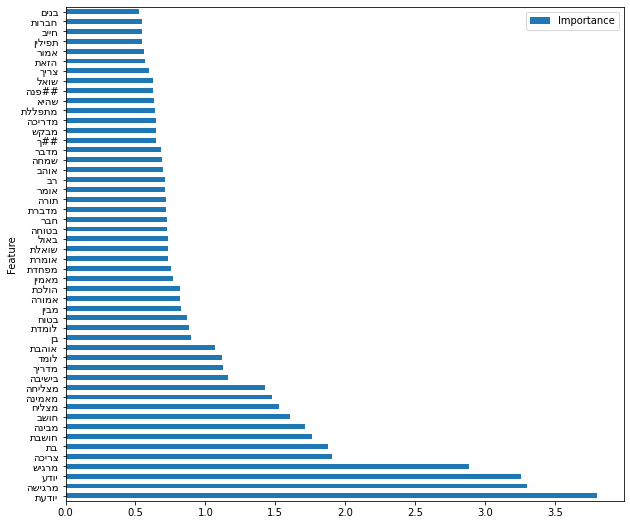

In [14]:
plot_features_importance(log_reg_bert.coef_[0], count_q_bert_feat_vec[0], 50)

#### Log Reg Cross Val

| Featurs | Train Accuracy | Test Accuracy |
| :-: | :-: | :-: |
| Count Vector Questions | 0.933 | 0.864
| Count Vector Questions (bert) | 0.943 | 0.863

In [15]:
log_reg_cv = LogRegCV(*count_q_feat_vec)
log_reg_bert_cv = LogRegCV(*count_q_bert_feat_vec)

LogRegCV train accuracy: 0.933
LogRegCV test accuracy: 0.864
Accuracy: 0.8640699523052464
[[577  51]
 [120 510]]
Classification report:
               precision    recall  f1-score   support

           1       0.83      0.92      0.87       628
           2       0.91      0.81      0.86       630

    accuracy                           0.86      1258
   macro avg       0.87      0.86      0.86      1258
weighted avg       0.87      0.86      0.86      1258

LogRegCV train accuracy: 0.943
LogRegCV test accuracy: 0.863
Accuracy: 0.863275039745628
[[574  54]
 [118 512]]
Classification report:
               precision    recall  f1-score   support

           1       0.83      0.91      0.87       628
           2       0.90      0.81      0.86       630

    accuracy                           0.86      1258
   macro avg       0.87      0.86      0.86      1258
weighted avg       0.87      0.86      0.86      1258



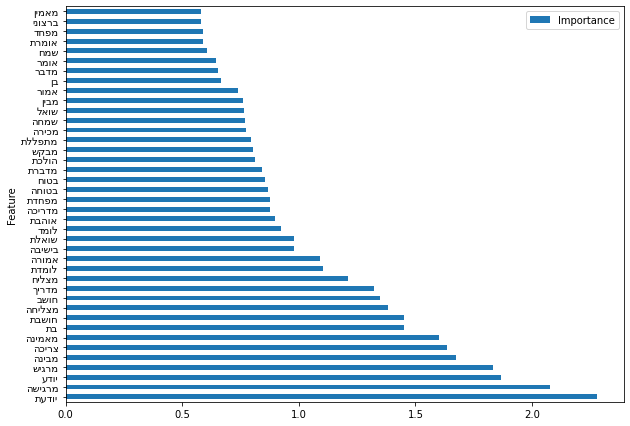

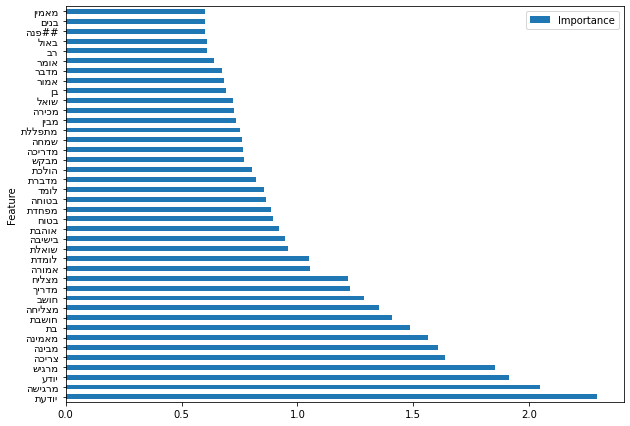

In [16]:
plot_features_importance(log_reg_cv.coef_[0], count_q_feat_vec[0], 40)
plot_features_importance(log_reg_bert_cv.coef_[0], count_q_bert_feat_vec[0], 40)

#### Log Reg + CV + Scaling

All models couldn't converge, even with 1000 iterations, and using Fast Convergance Solver ("sag", "saga")

Let's try scaling:

| Model | Featurs | Train Accuracy | Test Accuracy |
| :-: | :-: | :-: | :-: |
| Logistic Regression | Count Vector Questions | 0.887 | 0.852
| Logistic Regression CV | Count Vector Questions | 0.908 | 0.855

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [18]:
feat = count_q_feat.copy(deep=True)
feat_cols = [x for x in feat.columns if x not in ["Question", "Answer", "Gender", "QuestionLen", "AnswerLen"]]
feat[feat_cols] = scaler.fit_transform(feat[feat_cols])

X_train, X_test, y_train, y_test = df_train_test_split(feat)

In [19]:
count_q_feat.describe()

,QuestionLen,AnswerLen,Gender,אבא,אבי,אגב,אדם,אהבה,אהיה,אודה,...,תלוי,תמיד,תעזרו,תענו,תפילה,תפילות,תפילין,תקופה,תשובה,תשובות
count,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,...,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000
mean,603.559730,2701.784138,1.500894,0.035182,0.009938,0.012324,0.159014,0.032995,0.016299,0.019877,...,0.010137,0.136156,0.041542,0.029616,0.029616,0.012721,0.017690,0.024448,0.108527,0.032598
std,717.003513,1980.205941,0.500049,0.234573,0.134876,0.119005,0.521275,0.246858,0.137185,0.145176,...,0.111454,0.455960,0.212117,0.177562,0.192600,0.118963,0.175783,0.187052,0.381674,0.215066
min,10.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,244.000000,1370.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,434.000000,2276.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,733.500000,3497.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,26411.000000,21183.000000,2.000000,5.000000,5.000000,2.000000,6.000000,6.000000,3.000000,2.000000,...,2.000000,7.000000,3.000000,3.000000,3.000000,2.000000,5.000000,5.000000,4.000000,4.000000


In [20]:
feat.describe()

,QuestionLen,AnswerLen,Gender,אבא,אבי,אגב,אדם,אהבה,אהיה,אודה,...,תלוי,תמיד,תעזרו,תענו,תפילה,תפילות,תפילין,תקופה,תשובה,תשובות
count,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,...,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.000000,5031.00000,5031.000000,5031.000000
mean,603.559730,2701.784138,1.500894,0.007036,0.001988,0.006162,0.026502,0.005499,0.005433,0.009938,...,0.005069,0.019451,0.013847,0.009872,0.009872,0.006361,0.003538,0.00489,0.027132,0.008149
std,717.003513,1980.205941,0.500049,0.046915,0.026975,0.059503,0.086879,0.041143,0.045728,0.072588,...,0.055727,0.065137,0.070706,0.059187,0.064200,0.059482,0.035157,0.03741,0.095418,0.053766
min,10.000000,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,244.000000,1370.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,434.000000,2276.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,733.500000,3497.500000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,26411.000000,21183.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [21]:
log_reg = LogisticRegression()
 
log_reg.fit(X_train, y_train)

print(f"LogReg train accuracy: {log_reg.score(X_train, y_train):.3f}")
print(f"LogReg test accuracy: {log_reg.score(X_test, y_test):.3f}")
y_pred = log_reg.predict(X_test)
model_metrics(y_test, y_pred)

LogReg train accuracy: 0.887
LogReg test accuracy: 0.852
Accuracy: 0.8521462639109698
[[574  54]
 [132 498]]
Classification report:
               precision    recall  f1-score   support

           1       0.81      0.91      0.86       628
           2       0.90      0.79      0.84       630

    accuracy                           0.85      1258
   macro avg       0.86      0.85      0.85      1258
weighted avg       0.86      0.85      0.85      1258



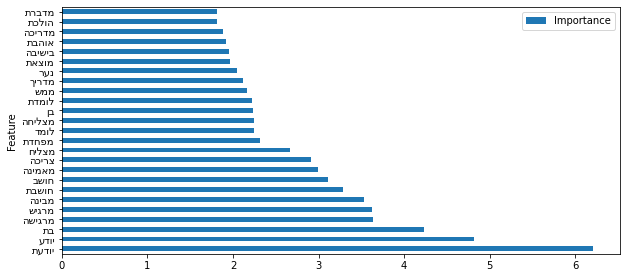

In [22]:
plot_features_importance(log_reg.coef_[0], X_train)

In [23]:
log_reg_cv = LogRegCV(X_train, X_test, y_train, y_test)

LogRegCV train accuracy: 0.908
LogRegCV test accuracy: 0.855
Accuracy: 0.8545310015898251
[[575  53]
 [130 500]]
Classification report:
               precision    recall  f1-score   support

           1       0.82      0.92      0.86       628
           2       0.90      0.79      0.85       630

    accuracy                           0.85      1258
   macro avg       0.86      0.85      0.85      1258
weighted avg       0.86      0.85      0.85      1258



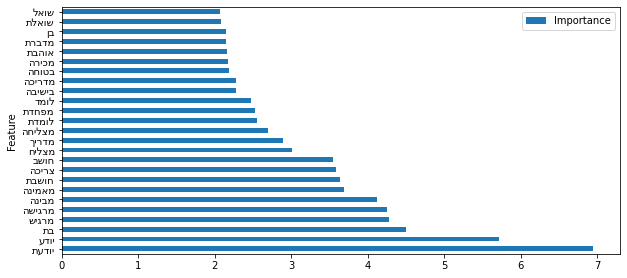

In [24]:
plot_features_importance(log_reg_cv.coef_[0], X_train)

### Random Forest

| Model | Featurs | Train Accuracy | Test Accuracy |
| :-: | :-: | :-: | :-: |
| Random Forest* | Count Vector Questions | 0.842 | 0.829
| Random Forest* | Count Vector Questions (bert) | 0.847 | 0.843
| Random Forest** | Count Vector Questions | 0.999 | 0.878
| Random Forest** | Count Vector Questions (bert) | 0.999 | 0.890
| Random Forest*** | Count Vector Questions | 0.907 | 0.878
| Random Forest*** | Count Vector Questions (bert) | 0.910 | 0.873

* \* n_estimators=100, max_depth=100, min_samples_leaf=1
* \** n_estimators=250, max_depth=100, min_samples_leaf=1
* \*** n_estimators=100, max_depth=25, min_samples_leaf=3

In [25]:
rand_for = RandForest(*count_q_feat_vec, n_estimators=100, max_depth=100, min_samples_leaf=1)
rand_for_bert = RandForest(*count_q_bert_feat_vec, n_estimators=100, max_depth=100, min_samples_leaf=1)

RandForest train accuracy: 0.842
RandForest test accuracy: 0.829
Accuracy: 0.829093799682035
[[604  24]
 [191 439]]
Classification report:
               precision    recall  f1-score   support

           1       0.76      0.96      0.85       628
           2       0.95      0.70      0.80       630

    accuracy                           0.83      1258
   macro avg       0.85      0.83      0.83      1258
weighted avg       0.85      0.83      0.83      1258

RandForest train accuracy: 0.847
RandForest test accuracy: 0.843
Accuracy: 0.8434022257551669
[[609  19]
 [178 452]]
Classification report:
               precision    recall  f1-score   support

           1       0.77      0.97      0.86       628
           2       0.96      0.72      0.82       630

    accuracy                           0.84      1258
   macro avg       0.87      0.84      0.84      1258
weighted avg       0.87      0.84      0.84      1258



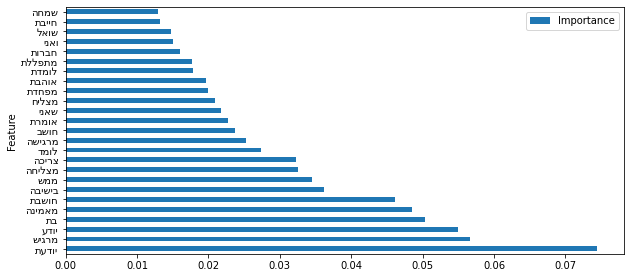

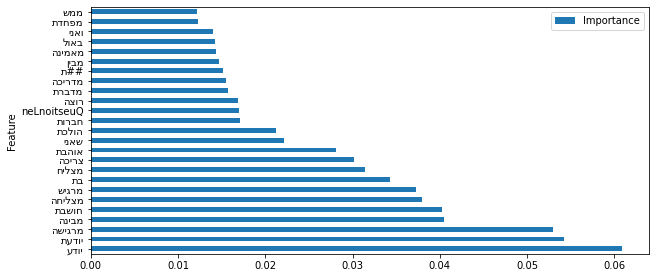

In [26]:
plot_features_importance(rand_for.feature_importances_, count_q_feat_vec[0])
plot_features_importance(rand_for_bert.feature_importances_, count_q_bert_feat_vec[0])

#### Random Forest Grid Search Cross Val

In [59]:
X_train, X_test, y_train, y_test = df_train_test_split(count_q_feat)

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
rf = RandomForestClassifier(max_features='sqrt', random_state=42, n_jobs=-1)  

param_grid = {
        "n_estimators" : [10, 50, 100, 250],  
        "max_depth" : [5, 25, 50, 75, 100, 200],  
        "min_samples_leaf" : [1, 5, 10, 20, 40]
    }  

CV_rf = GridSearchCV(estimator=rf, param_grid=param_grid, n_jobs=-1)  
CV_rf.fit(X_train, y_train)
    
print(CV_rf.best_params_)

{'max_depth': 100, 'min_samples_leaf': 1, 'n_estimators': 250}


In [35]:
CV_rf.best_score_

0.8788718885590316

In [52]:
from models import RandForest
import models
import importlib
importlib.reload(models)

<module 'models' from 'c:\\Users\\elroi\\OneDrive\\Desktop\\DataMining\\InformationRetrieval\\project\\models.py'>

In [63]:
rand_for_best = RandForest(*count_q_feat_vec, n_estimators=250, max_depth=100, min_samples_leaf=1)
rand_for_bert_best = RandForest(*count_q_bert_feat_vec, n_estimators=250, max_depth=100, min_samples_leaf=1)

RandForest train accuracy: 0.999
RandForest test accuracy: 0.878
Accuracy: 0.8783783783783784
[[579  49]
 [104 526]]
Classification report:
               precision    recall  f1-score   support

           1       0.85      0.92      0.88       628
           2       0.91      0.83      0.87       630

    accuracy                           0.88      1258
   macro avg       0.88      0.88      0.88      1258
weighted avg       0.88      0.88      0.88      1258

RandForest train accuracy: 0.999
RandForest test accuracy: 0.890
Accuracy: 0.890302066772655
[[584  44]
 [ 94 536]]
Classification report:
               precision    recall  f1-score   support

           1       0.86      0.93      0.89       628
           2       0.92      0.85      0.89       630

    accuracy                           0.89      1258
   macro avg       0.89      0.89      0.89      1258
weighted avg       0.89      0.89      0.89      1258



sadlly, Overfitting. One more Try:

In [64]:
rand_for_best = RandForest(*count_q_feat_vec, n_estimators=100, max_depth=25, min_samples_leaf=3)
rand_for_bert_best = RandForest(*count_q_bert_feat_vec, n_estimators=100, max_depth=25, min_samples_leaf=3)

RandForest train accuracy: 0.907
RandForest test accuracy: 0.878
Accuracy: 0.8783783783783784
[[593  35]
 [118 512]]
Classification report:
               precision    recall  f1-score   support

           1       0.83      0.94      0.89       628
           2       0.94      0.81      0.87       630

    accuracy                           0.88      1258
   macro avg       0.89      0.88      0.88      1258
weighted avg       0.89      0.88      0.88      1258

RandForest train accuracy: 0.910
RandForest test accuracy: 0.873
Accuracy: 0.8728139904610492
[[595  33]
 [127 503]]
Classification report:
               precision    recall  f1-score   support

           1       0.82      0.95      0.88       628
           2       0.94      0.80      0.86       630

    accuracy                           0.87      1258
   macro avg       0.88      0.87      0.87      1258
weighted avg       0.88      0.87      0.87      1258



## TFIDF

| Model | Featurs | Train Accuracy | Test Accuracy |
| :-: | :-: |:-: | :-: |
| Logistic Regression | TF-IDF Questions | 0.838 | 0.820
| Logistic Regression | TF-IDF Questions (bert) | 0.902 | 0.862
| Logistic Regression | TF-IDF Question + Answers | 0.945 | 0.899
| Logistic Regression | TF-IDF Question + Answers (bert) | 0.944 | 0.900
| **Random Forest** | **TF-IDF Questions** | **0.987** | **0.877**
| **Random Forest** | **TF-IDF Questions (bert)** | **0.989** | **0.877**
| Random Forest | TF-IDF Question + Answers | 0.999 | 0.920
| **Random Forest** | **TF-IDF Question + Answers (bert)** | **0.999** | **0.919**

In [66]:
tfidf_q = df_train_test_split(read_features_file(tfidf_Q))
tfidf_q_bert = df_train_test_split(read_features_file(tfidf_Q_bert))
tfidf_q_a = df_train_test_split(read_features_file(tfidf_Q_and_A))
tfidf_q_a_bert = df_train_test_split(read_features_file(tfidf_Q_and_A_bert))

In [71]:
all_features_vectors = [tfidf_q, tfidf_q_bert, tfidf_q_a, tfidf_q_a_bert]
all_features_strings = ["TF-IDF Questions", "TF-IDF Questions (bert)", "TF-IDF Question + Answers", "TF-IDF Question + Answers (bert)"]

### Logistic Regression

| Featurs | Train Accuracy | Test Accuracy |
| :-: | :-: | :-: |
| TF-IDF Questions | 0.838 | 0.820
| TF-IDF Questions (bert) | 0.902 | 0.862
| TF-IDF Question + Answers | 0.945 | 0.899
| TF-IDF Question + Answers (bert) | 0.944 | 0.900

| Featurs | Class| precision | recall | f1-score | support
| :-: | :-: | :-: | :-: | :-: | :-: |
| TF-IDF Questions | 1 | 0.79 | 0.87 | 0.83 | 628
|  | 2 | 0.86 | 0.77 | 0.81 | 630
|  | avg | 0.82 | 0.82 | 0.82 | 1258 |
| TF-IDF Questions (bert) | 1 | 0.83 | 0.92 | 0.87 | 628
|  | 2 | 0.91 | 0.81 | 0.85 | 630
|  | avg | 0.87 | 0.86 | 0.86 | 1258 |
| TF-IDF Question + Answers | 1 | 0.87 | 0.94 | 0.90 | 628
|  | 2 | 0.94 | 0.86 | 0.89 | 630
|  | avg | 0.90 | 0.90 | 0.90 | 1258 |
| TF-IDF Question + Answers (bert) | 1 | 0.87 | 0.94 | 0.90 | 628
|  | 2 | 0.94 | 0.86 | 0.90 | 630
|  | avg | 0.90 | 0.90 | 0.90 | 1258 |

In [ ]:
log_reg_models = []

for feat, name in zip(all_features_vectors, all_features_strings):
    print("*"*30 + " {:^40} ".format(name) + "*"*30)
    log_reg_models.append(LogReg(*feat))


In [74]:
import matplotlib.pyplot as plt

********************   TF-IDF Questions   ********************


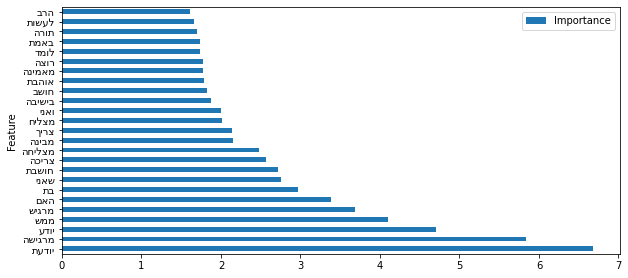

******************** TF-IDF Questions (bert) ********************


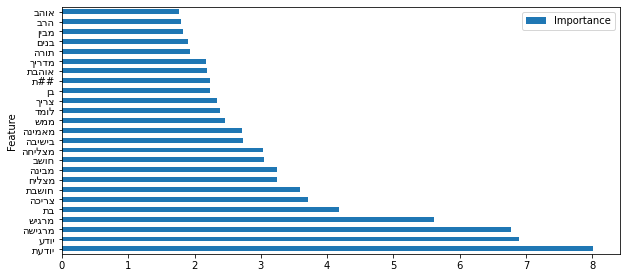

******************** TF-IDF Question + Answers ********************


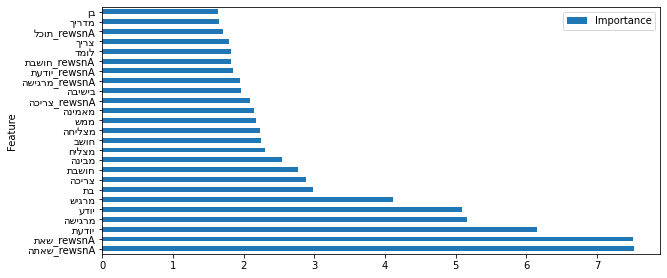

******************** TF-IDF Question + Answers (bert) ********************


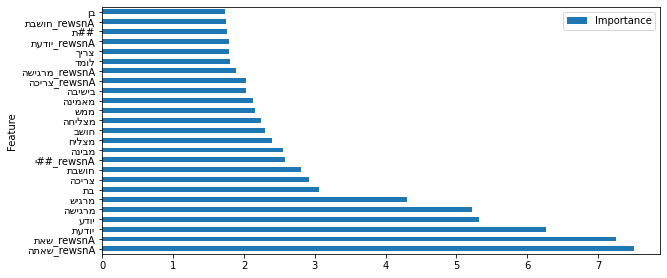

In [73]:
for i in range(4):
    print("*"*30 + " {:^40} ".format(all_features_strings[i]) + "*"*30)
    plot_features_importance(log_reg_models[i].coef_[0], all_features_vectors[i][0])
    plt.show()

### Random Forest

| Featurs | Train Accuracy | Test Accuracy |
| :- | :-: | :-: |
| TF-IDF Questions | 0.987 | 0.877
| **TF-IDF Questions (bert)** | 0.989 | 0.877
| TF-IDF Question + Answers | 0.999 | 0.920
| **TF-IDF Question + Answers (bert)** | 0.999 | 0.919

| Features | Class| precision | recall | f1-score | support
| :- | :-: | :-: | :-: | :-: | :-: |
| TF-IDF Questions | 1 | 0.84 | 0.93 | 0.88 | 628
|  | 2 | 0.92 | 0.82 | 0.87 | 630
|  | avg | 0.88 | 0.88 | 0.88 | 1258
| TF-IDF Questions (bert) | 1 | 0.84 | 0.93 | 0.88 | 628
|  | 2 | 0.92 | 0.82 | 0.87 | 630
|  | avg | 0.88 | 0.88 | 0.88 | 1258
| TF-IDF Question + Answers | 1 | 0.89 | 0.96 | 0.92 | 628
|  | 2 | 0.96 | 0.88 | 0.92 | 630
|  | avg | 0.92 | 0.92 | 0.92 | 1258
| TF-IDF Question + Answers (bert) | 1 | 0.89 | 0.96 | 0.92 | 628
|  | 2 | 0.95 | 0.88 | 0.92 | 630
|  | avg | 0.92 | 0.92 | 0.92 | 1258

In [75]:
rand_forest_models = []

for feat, name in zip(all_features_vectors, all_features_strings):
    print("*"*30 + " {:^40} ".format(name) + "*"*30)
    rand_forest_models.append(RandForest(*feat, n_estimators=100, max_depth=50))


******************************   TF-IDF Questions   ******************************
RandForest train accuracy: 0.987
RandForest test accuracy: 0.877
Accuracy: 0.8767885532591415
[[584  44]
 [111 519]]
Classification report:
               precision    recall  f1-score   support

           1       0.84      0.93      0.88       628
           2       0.92      0.82      0.87       630

    accuracy                           0.88      1258
   macro avg       0.88      0.88      0.88      1258
weighted avg       0.88      0.88      0.88      1258

****************************** TF-IDF Questions (bert) ******************************
RandForest train accuracy: 0.989
RandForest test accuracy: 0.877
Accuracy: 0.8767885532591415
[[585  43]
 [112 518]]
Classification report:
               precision    recall  f1-score   support

           1       0.84      0.93      0.88       628
           2       0.92      0.82      0.87       630

    accuracy                           0.88      1258
   m

******************************             TF-IDF Questions             ******************************


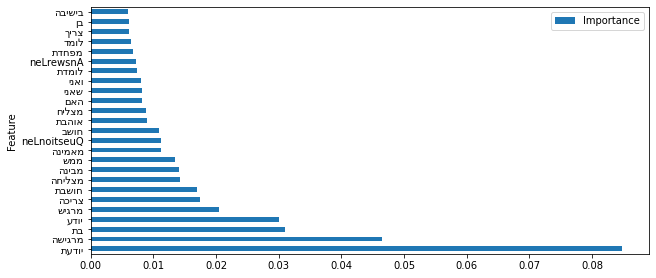

******************************         TF-IDF Questions (bert)          ******************************


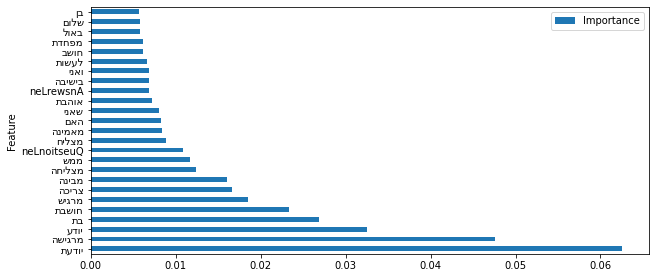

******************************        TF-IDF Question + Answers         ******************************


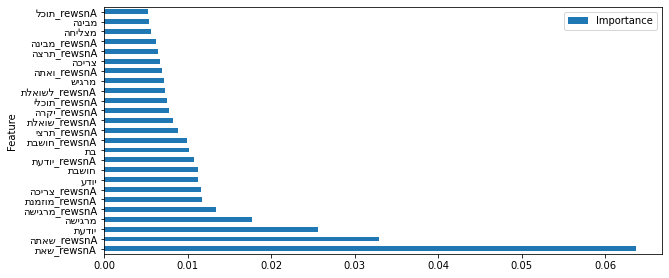

******************************     TF-IDF Question + Answers (bert)     ******************************


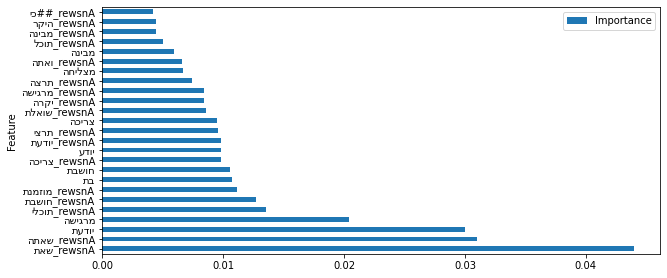

In [76]:
for i in range(4):
    print("*"*30 + " {:^40} ".format(all_features_strings[i]) + "*"*30)
    plot_features_importance(rand_forest_models[i].feature_importances_, all_features_vectors[i][0])
    plt.show()

We Can see that **Random Forest** model, with the **TF-IDF Question + Answers** features, Using the **Bert tokenzier**, is the **Best model so far**, with features from the Questions and the Answers.

We can also See that **Random Forest** model, with the **TF-IDF Question**, Using the **Bert tokenzier**, is the **Best model** that works only on the persons' self writing.

Let's try to make them better:

In [79]:
from models import RFGSCV
import models
importlib.reload(models)

<module 'models' from 'c:\\Users\\elroi\\OneDrive\\Desktop\\DataMining\\InformationRetrieval\\project\\models.py'>

In [80]:
best_feat = all_features_vectors[3]
param_grid = {
        "n_estimators" : [10, 50, 100, 250],  
        "max_depth" : [5, 25, 50, 75, 100, 200],  
        "min_samples_leaf" : [1, 5, 10, 20, 40]
    }

rfgs_model = RFGSCV(*best_feat, param_grid)

{'max_depth': 75, 'min_samples_leaf': 1, 'n_estimators': 250}
63
0.9268452579619513
RandomForestClassifier(max_depth=75, n_estimators=250, n_jobs=-1,
                       random_state=42)


GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             param_grid={'max_depth': [5, 25, 50, 75, 100, 200],
                         'min_samples_leaf': [1, 5, 10, 20, 40],
                         'n_estimators': [10, 50, 100, 250]})

In [81]:
rand_for_best = RandForest(*best_feat, n_estimators=250, max_depth=75, min_samples_leaf=1)

RandForest train accuracy: 1.000
RandForest test accuracy: 0.924
Accuracy: 0.9236883942766295
[[601  27]
 [ 69 561]]
Classification report:
               precision    recall  f1-score   support

           1       0.90      0.96      0.93       628
           2       0.95      0.89      0.92       630

    accuracy                           0.92      1258
   macro avg       0.93      0.92      0.92      1258
weighted avg       0.93      0.92      0.92      1258



Examine the Questions only Features Model:

In [82]:
best_feat_q_only = all_features_vectors[1]
param_grid = {
        "n_estimators" : [10, 50, 100, 250],  
        "max_depth" : [5, 25, 50, 75, 100, 200],  
        "min_samples_leaf" : [1, 5, 10, 20, 40]
    }

rfgs_model = RFGSCV(*best_feat_q_only, param_grid)

{'max_depth': 200, 'min_samples_leaf': 1, 'n_estimators': 100}
102
0.8778136912185783
RandomForestClassifier(max_depth=200, n_jobs=-1, random_state=42)


In [ ]:
rand_forest_best_q_only = RandForest(*best_feat_q_only, n_estimators=250, max_depth=75, min_samples_leaf=1)

## Results

| Model | Featurs | Train Accuracy | Test Accuracy |
| :-: | :-: | :-: | :-: |
| Logistic Regression | Count Vector Questions | 0.904 | 0.865
| **Logistic Regression** | **Count Vector Questions (bert)** | **0.912** | **0.869**
| Logistic Regression | Count Vector Questions | 0.933 | 0.864
| Logistic Regression | Count Vector Questions (bert) | 0.943 | 0.863
| Logistic Regression | Count Vector Questions | 0.887 | 0.852
| Logistic Regression CV | Count Vector Questions | 0.908 | 0.855

| Model | Featurs | Train Accuracy | Test Accuracy |
| :-: | :-: | :-: | :-: |
| Random Forest* | Count Vector Questions | 0.842 | 0.829
| Random Forest* | Count Vector Questions (bert) | 0.847 | 0.843
| Random Forest** | Count Vector Questions | 0.999 | 0.878
| Random Forest** | Count Vector Questions (bert) | 0.999 | 0.890
| Random Forest*** | Count Vector Questions | 0.907 | 0.878
| Random Forest*** | Count Vector Questions (bert) | 0.910 | 0.873

* \* n_estimators=100, max_depth=100, min_samples_leaf=1
* \** n_estimators=250, max_depth=100, min_samples_leaf=1
* \*** n_estimators=100, max_depth=25, min_samples_leaf=3

| Model | Featurs | Train Accuracy | Test Accuracy |
| :-: | :-: | :-: | :-: |
| Logistic Regression | TF-IDF Questions | 0.838 | 0.820
| Logistic Regression | TF-IDF Questions (bert) | 0.902 | 0.862
| Logistic Regression | TF-IDF Question + Answers | 0.945 | 0.899
| Logistic Regression | TF-IDF Question + Answers (bert) | 0.944 | 0.900
| **Random Forest\*** | **TF-IDF Questions** | **0.987** | **0.877**
| **Random Forest\*** | **TF-IDF Questions (bert)** | **0.989** | **0.877**
| Random Forest\* | TF-IDF Question + Answers | 0.999 | 0.920
| **Random Forest\*** | **TF-IDF Question + Answers (bert)** | **0.999** | **0.919**
| **Random Forest CV\*\*** | **TF-IDF Question + Answers (bert)** | **1.0** | **0.924**

* \* n_estimators=100, max_depth=50
* \** n_estimators=250, max_depth=75, min_samples_leaf=1